# Clusterización
## Usando Kmeans

Con datos arbitrarios


## Objetivo

Cómo realizar la agrupación en clústeres de K-Means en Python

Se realizará un recorrido paso a paso para revisar el flujo de análisis para usar el algoritmo k-means. Comprender los detalles del algoritmo es un paso fundamental en el proceso de escribir su implementación de k-means en Python. Ayudará a decidir si k-means es la opción correcta para resolver su problema de agrupamiento.


In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importación de las bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Para graficar
import plotly.express as px
import plotly.graph_objects as go

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Comprender el algoritmo K-Means

Los k-means convencionales requieren solo unos pocos pasos. El primer paso es seleccionar aleatoriamente k centroides, donde k es igual al número de clústeres que elija.  Los centroides son puntos de datos que representan el centro de un clúster.

El elemento principal del algoritmo funciona mediante un proceso de dos pasos llamado maximización de expectativas. 

El paso de expectativa asigna cada punto de datos a su centroide más cercano. A continuación, el  paso de maximización calcula la media de todos los puntos para cada clúster y establece el nuevo centroide. Así es como se ve la versión convencional del algoritmo k-means:


Puede generar los datos arbitrariamente se utiliza make_blobs(), una función de conveniencia en scikit-learn utilizada para generar clústeres sintéticos.  

**make_blobs**() utiliza estos parámetros:

1.	n_samples es el número total de muestras a generar.
2.	centers es el número de centros a generar.
3.	cluster_std es la desviación estándar.

**make_blobs**() devuelve una tupla de dos valores:

1.	Una matriz NumPy bidimensional con los valores x e y para cada una de las muestras
2.	Una matriz NumPy unidimensional que contiene las etiquetas de clúster para cada muestra




Se procede a generar los datos sintéticos y las etiquetas:

In [3]:
features, true_labels = make_blobs(
    n_samples=200,      # se van a crear 200 muestras
    centers=3,          # número de centros
    n_features=2,       # Número de características
    cluster_std=2.75,   # desviación estándar de los datos que se van a generar aleatoriamente
    random_state=0)


Los algoritmos de aprendizaje automático no deterministas como k-means son difíciles de reproducir. 

El  parámetro random_state se establece en un valor entero para que pueda seguir reproducir los resultados.. 

Aquí hay una visualizacón a los primeros cinco elementos para cada una de las variables producidas por **make_blobs**():


In [4]:
# los valores de las características producidas
features[:5]

array([[-2.09588912,  5.33837427],
       [ 0.01951167,  4.73374699],
       [ 1.4023755 ,  5.34373426],
       [-1.25816035,  4.52100488],
       [ 1.79642506,  7.95134854]])

In [5]:
# las etiquetas generadas
true_labels[:5]

array([2, 0, 0, 2, 0])

## Escalado

Los conjuntos de datos generalmente contienen características numéricas que se han medido en diferentes unidades, como la altura (en pulgadas) y el peso (en libras). 

Un algoritmo de aprendizaje automático consideraría que el peso es más importante que la altura solo porque los valores de peso son más grandes y tienen una **mayor variabilidad** de persona a persona.

Los algoritmos de aprendizaje automático deben considerar todas las características esten bajo la misma escala de valores. Eso significa que los valores de todas las entidades deben transformarse a la misma escala.

El proceso de transformación de entidades numéricas para utilizar la misma escala se conoce como escalado de características. 

Es un paso importante de preprocesamiento de datos  para la mayoría de los algoritmos de aprendizaje automático basados en la distancia, ya que puede tener un impacto significativo en el rendimiento de su algoritmo.

Existen varios enfoques para implementar el escalado de características. 

En este ejemplo, usará la clase StandardScaler. Esta clase implementa un tipo de escalado de características denominado estandarización. La estandarización escala, o desplaza, los valores de cada entidad numérica del conjunto de datos para que las entidades tengan una media de 0 y una desviación estándar de 1

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [7]:
scaled_features[:5]

array([[-0.73411211,  0.82841827],
       [-0.0659294 ,  0.63727076],
       [ 0.37086995,  0.83011278],
       [-0.46950226,  0.57001424],
       [ 0.49533672,  1.65448674]])

## Aplicación del algoritmo de Custerización por medio de KMeans

Ahora los datos están listos para ser agrupados. La clase de estimador KMeans en scikit-learn es donde se establecen los parámetros del algoritmo antes de ajustar el estimador a los datos. La implementación de scikit-learn es flexible, proporcionando varios parámetros que se pueden ajustar.
Estos son los parámetros utilizados en este ejemplo:

* init controla la técnica de inicialización. La versión estándar del  algoritmo k-means se implementa estableciendo init en "random".

* n_clusters establece el valor de **k** para el paso de agrupación en clústeres. Este es el parámetro más importante para k-medias.

* n_init establece el número de inicializaciones que se van a realizar. Esto es importante porque dos ejecuciones pueden converger en diferentes asignaciones de clúster. El comportamiento predeterminado para el algoritmo scikit-learn es realizar diez ejecuciones de k-means y devolver los resultados de la que tiene el SSE más bajo.

* max_iter establece el número de iteraciones máximas para cada inicialización del algoritmo k-means.

Cree una instancia de la clase KMeans con los siguientes argumentos:


In [8]:
modelo_kmeans = KMeans(
    init="random",
    n_clusters=3,    # Número de centros por caracterizar
    n_init=10,
    max_iter=300,
    random_state=0
    )


## Entrenamiento

Ahora que la clase k-means está lista, el siguiente paso es ajustarla a los datos en scaled_features. 

Esto realizará diez ejecuciones del algoritmo k-means en sus datos con un máximo de 300 iteraciones por ejecución:

In [9]:
modelo_kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [10]:
modelo_kmeans.inertia_

180.35301972497396

In [11]:
modelo_kmeans.cluster_centers_

array([[-0.50411066,  0.9020415 ],
       [-0.39355645, -0.83734994],
       [ 1.21146565, -0.05524245]])

In [12]:
modelo_kmeans.n_iter_

16

Finalmente, las asignaciones de clúster se almacenan como una matriz NumPy unidimensional en kmeans.labels_. 

Aquí hay un vistazo a las primeras cinco etiquetas predichas:

In [13]:
modelo_kmeans.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int32)

## Visualización

In [14]:
df = pd.DataFrame(features, columns=['x', 'y'])
df['labels'] = modelo_kmeans.labels_
df['labels'] = df['labels'].astype('category')
df.head()

x         y labels
0 -2.095889  5.338374      0
1  0.019512  4.733747      0
2  1.402375  5.343734      0
3 -1.258160  4.521005      0
4  1.796425  7.951349      0

## Descripción de los centros obtenidos

In [15]:
# Devolver el resultado de los centros hacia la escala original
centros_no_escalados = scaler.inverse_transform(modelo_kmeans.cluster_centers_)

df_centros = pd.DataFrame(centros_no_escalados, columns=['x', 'y'])


df_centros.index.name = 'labels'
df_centros.reset_index(inplace=True)
df_centros['labels'] = df_centros['labels'].astype('category')
df_centros.head()

labels         x         y
0      0 -1.367727  5.571255
1      1 -1.017723  0.069308
2      2  4.063619  2.543227

In [16]:
# Definir el gráfico de dispersión de los puntos de las características
fig_features = px.scatter(df, x="x", y="y", color='labels')

# Definir el gráfico de dispersión de los puntos de los centros
fig_centros = px.scatter(df_centros, x="x", y="y", color='labels')

fig_centros.update_traces(
    marker=dict(size=20, symbol="diamond"))

fig3 = go.Figure(data=fig_features.data + fig_centros.data)
fig3.show()

## Predicción

In [17]:
# Creando nuevos datos
nuevos_datos_df = pd.DataFrame([
    [2, 2],
    [2, -2],
    [-2, 2],
    [-2, -2],
],
    columns=['x', 'y'])
nuevos_datos_df.head()

x  y
0  2  2
1  2 -2
2 -2  2
3 -2 -2

In [18]:
# obteniendo predicción
modelo_kmeans.predict(nuevos_datos_df.values)

array([2, 2, 0, 1], dtype=int32)

# **Elegir el número adecuado de clústeres**

En esta sección, verá dos métodos que se usan comúnmente para evaluar el número adecuado de clústeres:
1.	El método del codo
2.	El coeficiente de silueta

A menudo se utilizan como técnicas de evaluación complementarias en lugar de que se prefiera una sobre la otra. Para realizar el método del codo, ejecute varias k-medias, incremente k con cada iteración y registre el SSE.

**Nota**: La inercia KMeans, también conocida como Suma de Errores de Cuadrados (o SSE), calcula la suma de las distancias de todos los puntos dentro de un clúster desde el centroide del punto. Es la diferencia entre el valor observado y el valor predicho. Se calcula utilizando la suma de los valores menos las medias, al cuadrado.


In [19]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }


In [20]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Cuando grafica la ESS en función del número de clústeres, observe que la ESS continúa disminuyendo a medida que aumenta k. A medida que se agreguen más centroides, la distancia desde cada punto hasta su centroide más cercano disminuirá.

Hay un punto óptimo donde la curva de la ESS comienza a doblarse conocida como el punto del codo. Se cree que el valor x de este punto es una compensación razonable entre el error y el número de grupos. En este ejemplo, el codo se encuentra en x=3:


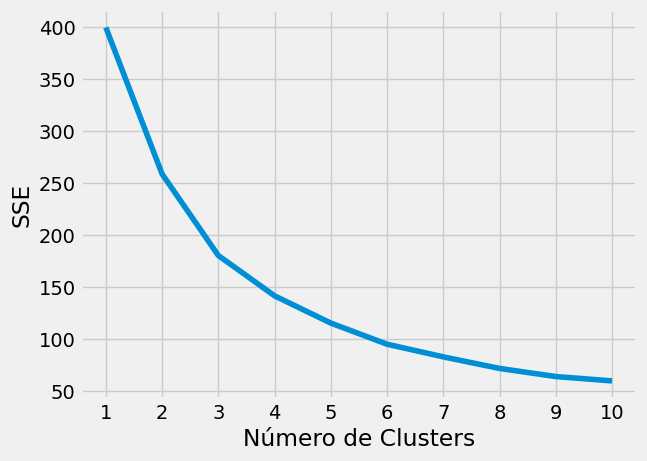

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")

plt.show()


Determinar el punto del codo en la curva de ESS no siempre es sencillo. Si tiene problemas para elegir el punto del codo de la curva, puede usar un paquete de Python, kneed, para identificar el punto del codo mediante programación:

In [22]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )


In [23]:
kl.elbow

4

# **El coeficiente de silueta**

 es una medida de la cohesión y separación del clúster. Cuantifica qué tan bien encaja un punto de datos en su clúster asignado en función de dos factores:
1.	Qué tan cerca está el punto de datos de otros puntos del clúster
2.	Qué tan lejos está el punto de datos de los puntos de otros clústeres
Los valores del coeficiente de silueta oscilan entre -1 y 1. Los números más grandes indican que las muestras están más cerca de sus grupos que de otros grupos.
En la implementación scikit-learn del coeficiente de silueta, el coeficiente de silueta promedio de todas las muestras se resume en una puntuación. La  función silhouette score() necesita un mínimo de dos clústeres, o generará una excepción.
Vuelva a recorrer los valores de k. Esta vez, en lugar de calcular SSE, calcule el coeficiente de silueta:


In [24]:
silhouette_coefficients = []
   
   # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

Trazar los puntajes promedio de silueta para cada k muestra que la mejor opción para k es 3, ya que tiene el puntaje máximo:

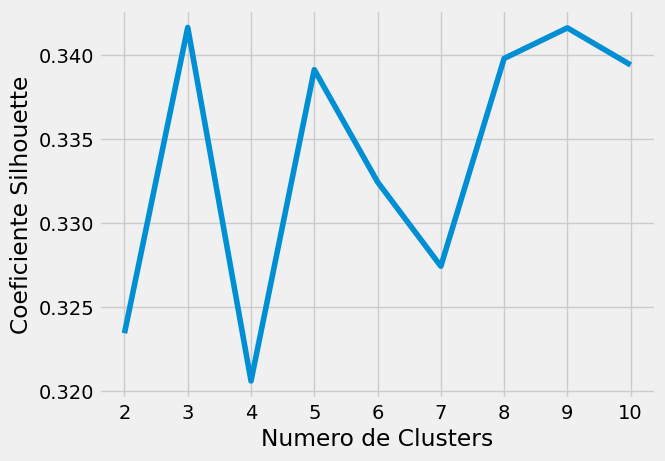

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("Coeficiente Silhouette")
plt.show()